In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
from sklearn.datasets import load_iris
import numpy
import pickle
import dill as dill
#loading iris data from sklearn
iris = load_iris()
x_data=iris.data
y_data=iris.target

#numpy to pytorch variable
x_data = Variable(torch.Tensor(x_data).float())
y_data = Variable(torch.tensor(y_data).float())

#batch size
batch_size=150

EPOCH = 10

In [2]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(4, 2),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [3]:
autoencoder = AutoEncoder()
loss_fun = nn.MSELoss()
opt= torch.optim.SGD(autoencoder.parameters(),lr=0.01)
#model summary
print(autoencoder)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=4, out_features=2, bias=True)
    (1): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
  )
)


In [5]:
#training
for epoch in range(150):
    encoded, decoded = autoencoder(x_data)
    
    loss = loss_fun(decoded,x_data)
    opt.zero_grad()
    
    loss.backward()
    opt.step()     
    

    if epoch in range(150):
        print('number of epoch', epoch, 'loss', loss.data)

number of epoch 0 loss tensor(10.2860)
number of epoch 1 loss tensor(10.2828)
number of epoch 2 loss tensor(10.2797)
number of epoch 3 loss tensor(10.2767)
number of epoch 4 loss tensor(10.2737)
number of epoch 5 loss tensor(10.2708)
number of epoch 6 loss tensor(10.2679)
number of epoch 7 loss tensor(10.2651)
number of epoch 8 loss tensor(10.2623)
number of epoch 9 loss tensor(10.2596)
number of epoch 10 loss tensor(10.2569)
number of epoch 11 loss tensor(10.2543)
number of epoch 12 loss tensor(10.2517)
number of epoch 13 loss tensor(10.2492)
number of epoch 14 loss tensor(10.2467)
number of epoch 15 loss tensor(10.2443)
number of epoch 16 loss tensor(10.2419)
number of epoch 17 loss tensor(10.2395)
number of epoch 18 loss tensor(10.2372)
number of epoch 19 loss tensor(10.2350)
number of epoch 20 loss tensor(10.2327)
number of epoch 21 loss tensor(10.2305)
number of epoch 22 loss tensor(10.2284)
number of epoch 23 loss tensor(10.2262)
number of epoch 24 loss tensor(10.2241)
number of 

In [8]:
autoencoder.train()

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=4, out_features=2, bias=True)
    (1): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
  )
)

Text(0.5, 1.0, 'Latent space')

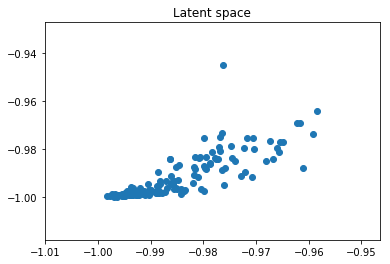

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

data_array = encoded.detach().numpy()

plt.scatter(data_array[:,0],data_array[:,1])
plt.title("Latent space")